<a href="https://colab.research.google.com/github/spyrgalaz/DNN/blob/main/Sharpe_Ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##What Is the Sharpe Ratio?
The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk.
 The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

 Formula and Calculation of Sharpe Ratio
\begin{aligned} &\textit{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}\\ &\textbf{where:}\\ &R_{p}=\text{return of portfolio}\\ &R_{f} = \text{risk-free rate}\\ &\sigma_p = \text{standard deviation of the portfolio's excess return}\\ \end{aligned} 
​	  

The Sharpe ratio is usually calculated for a portfolio and uses the risk-free interest rate as benchmark. We will simplify our example and use stocks instead of a portfolio. We will also use a stock index as benchmark rather than the risk-free interest rate because both are readily available at daily frequencies and we do not have to get into converting interest rates from annual to daily frequency.


In [26]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data//// UPLOAD THE FILE!!!
stock_data = pd.read_csv('/content/stock_data.csv', 
    parse_dates=['Date'],
    index_col='Date').dropna()
benchmark_data = pd.read_csv('/content/benchmark_data.csv', 
    parse_dates=['Date'],
    index_col='Date').dropna()


In [27]:
# Display summary for stock_data
print('Stocks\n')
stock_data.info()
print(stock_data.head())

# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()
benchmark_data.head()

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


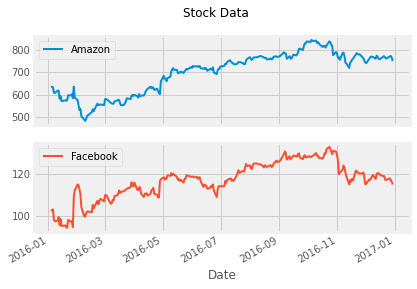

In [30]:
# visualize the stock_data
stock_data.plot(title='Stock Data', subplots=True,linewidth=2);

# summarize the stock_data
stock_data.describe()

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


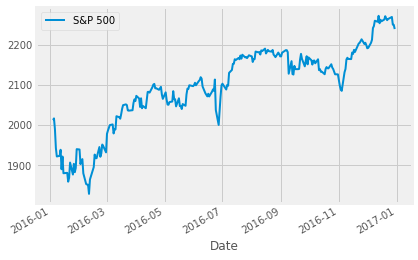

In [31]:
# plot the benchmark_data
benchmark_data.plot(linewidth=2);

# summarize the benchmark_data
benchmark_data.describe()


,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


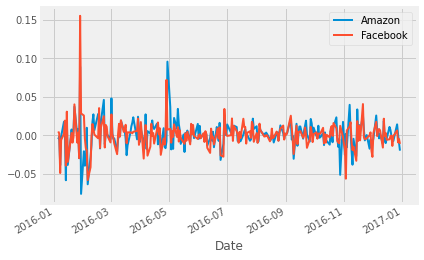

In [32]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot(linewidth=2);

# summarize the daily returns
stock_returns.describe()

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

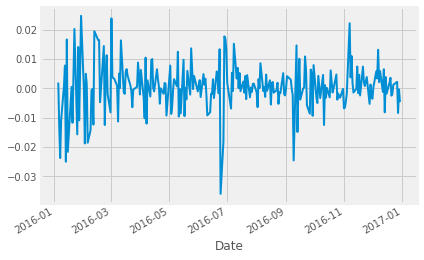

In [33]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot(linewidth=2);

# summarize the daily returns
sp_returns.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


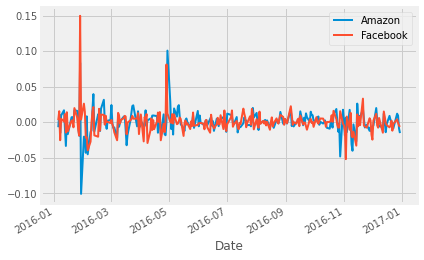

In [34]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot(linewidth=2);

# summarize the excess_returns
excess_returns.describe()

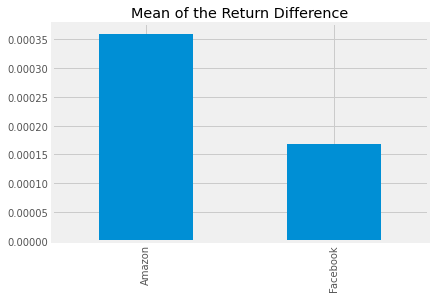

In [36]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference');

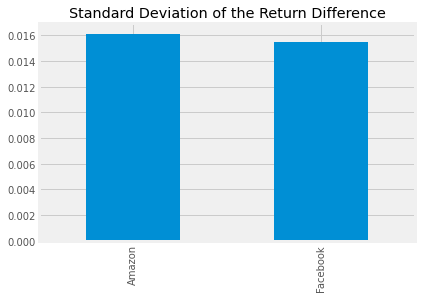

In [37]:
# Next, we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference');

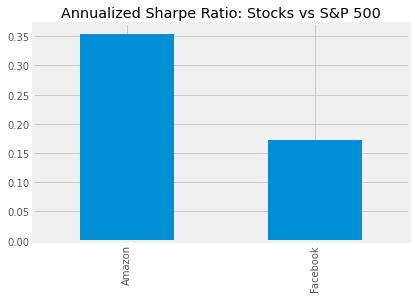

In [38]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio 
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500');

#Conclusion
Given the two Sharpe ratios, which investment should we go for? In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&P 500 for each unit of risk an investor would have assumed.